In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Q1_property.csv')

# Choosing Lahore as a city for Regression Analysis
df = df[df['city']=='Lahore']
df = df.reset_index(drop=True)

# Data Pre Processing
print(df.dtypes)
df['purpose'] = df['purpose'].fillna(df['purpose'][0])
df['date_added'] = df['date_added'].fillna(df['date_added'][0])
df['agency'] = df['agency'].fillna(df['agency'][0])
df['agent'] = df['agent'].fillna(df['agent'][0])
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean())
df.isnull().sum()


property_id        int64
location_id        int64
page_url          object
property_type     object
price              int64
location          object
city              object
province_name     object
latitude         float64
longitude        float64
baths            float64
area              object
purpose           object
bedrooms         float64
date_added        object
agency            object
agent             object
dtype: object


property_id      0
location_id      0
page_url         0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
area             0
purpose          0
bedrooms         0
date_added       0
agency           0
agent            0
dtype: int64

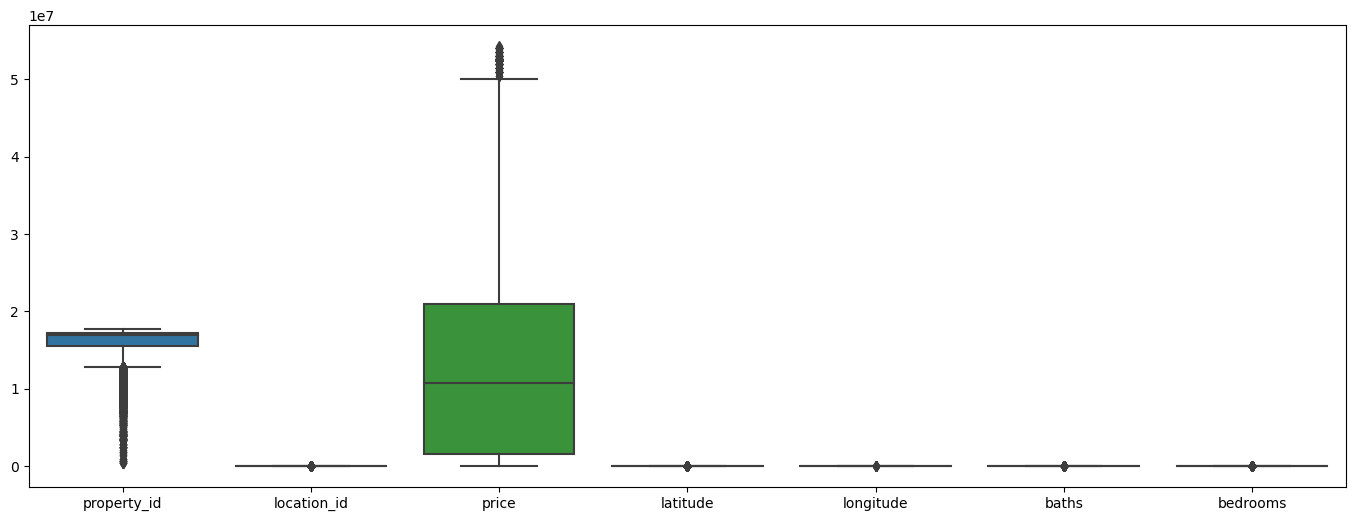

MAX = 50000000 MEAN = 13377565.108682834 MIN = 1


In [5]:
# Outliers
plt.figure(figsize=(17, 6))
sns.boxplot(data=df)
plt.show()

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price']> (Q3 + 1.5 * IQR)))]
df

print("MAX =", df['price'].max(), "MEAN =", df['price'].mean(), "MIN =", df['price'].min())

C:\Users\moizm\AppData\Local\Temp\ipykernel_7132\2739160345.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.35)


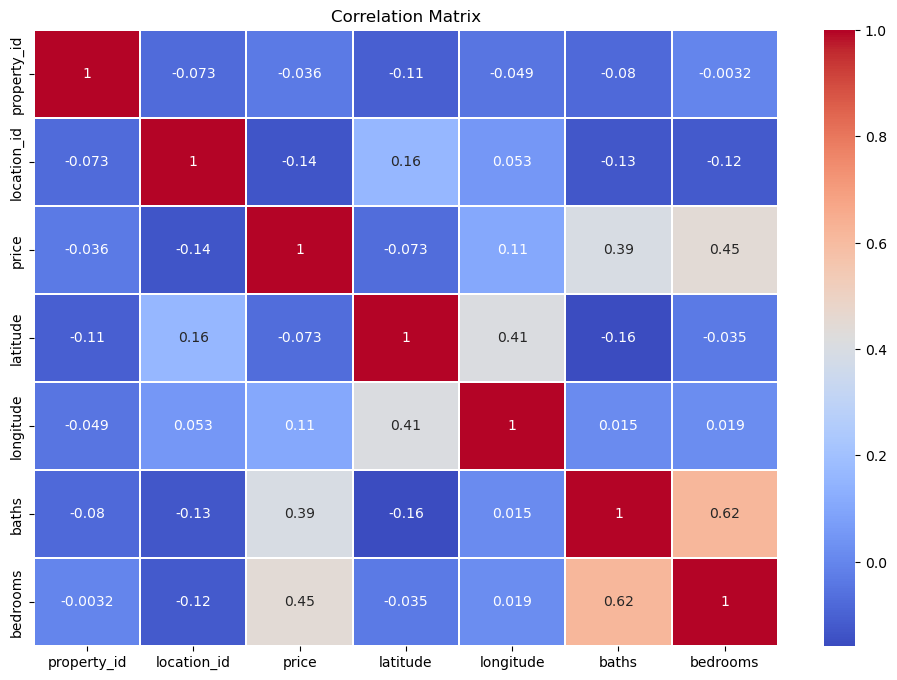

The correlation between the number of properties listed by an agent or agency and the average property price is -0.0019828699935898367


In [6]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.35)
plt.title('Correlation Matrix')
plt.show()

grouped = df.groupby(['agent', 'agency']).agg({'property_id': 'count', 'price': 'mean'}).reset_index()
grouped.columns = ['agent', 'agency', 'num_properties', 'avg_price']
correlation = grouped['num_properties'].corr(grouped['avg_price'])

print(f"The correlation between the number of properties listed by an agent or agency and the average property price is {correlation}")

In [7]:
# Feature Engineering

df['area'] = df['area'].astype(str)
df['area'] = df['area'].str.replace(' Kanal', '')
df['area'] = df['area'].str.replace(' Marla', '')
df['area'] = df['area'].astype('float64')

df

C:\Users\moizm\AppData\Local\Temp\ipykernel_7132\3004656527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area'] = df['area'].astype(str)
C:\Users\moizm\AppData\Local\Temp\ipykernel_7132\3004656527.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area'] = df['area'].str.replace(' Kanal', '')
C:\Users\moizm\AppData\Local\Temp\ipykernel_7132\3004656527.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5.0,1.0,For Sale,5.0,10/6/2018,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0.0,9.0,For Sale,3.0,7/3/2019,Shahum Estate 2,Babar Hameed
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5.0,11.0,For Sale,6.0,4/4/2019,Real Biz International,Usama Khan
6,891543,4031,https://www.zameen.com/Property/military_accou...,House,16500000,Military Accounts Housing Society,Lahore,Punjab,31.421229,74.285560,7.0,8.0,For Sale,6.0,7/3/2019,Real Biz International,Usama Khan
7,983065,3749,https://www.zameen.com/Property/eme_society_em...,House,32500000,EME Society,Lahore,Punjab,31.439978,74.209685,0.0,1.0,For Sale,5.0,7/3/2019,Sukhera Estate & Builders,Ahmed Sheraz Sukhera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58626,17468968,1587,https://www.zameen.com/Property/dha_phase_3_dh...,Upper Portion,125000,DHA Defence,Lahore,Punjab,31.470949,74.375038,0.0,2.0,For Rent,4.0,7/24/2019,M Ahmad Associates,Rizwan Saeed
58627,17468985,1602,https://www.zameen.com/Property/dha_phase_5_dh...,House,185000,DHA Defence,Lahore,Punjab,31.460919,74.410830,6.0,1.0,For Rent,5.0,7/24/2019,SM Builders & Real Estate Consultants,Ch Umar
58628,17469039,1607,https://www.zameen.com/Property/dha_phase_5_dh...,House,150000,DHA Defence,Lahore,Punjab,31.463665,74.400616,5.0,10.0,For Rent,4.0,7/24/2019,Super Homes,Zahid Ali Shah
58629,17469096,1591,https://www.zameen.com/Property/dha_phase_4_dh...,Upper Portion,70000,DHA Defence,Lahore,Punjab,31.463994,74.379544,3.0,1.0,For Rent,3.0,7/24/2019,Safari Estate,CH Muqarab Warraich


In [8]:
# Calculate 'price_per_square_meter'
df['price'] = df['price'].astype('float64')
df['price_per_square_meter'] = df['price'] / df['area']

# Convert the date column to datetime
df['date_added'] = pd.to_datetime(df['date_added'])
df['month'] = df['date_added'].dt.month
df['quarter'] = df['date_added'].dt.quarter
df['day_of_week'] = df['date_added'].dt.dayofweek 

df = df.drop('date_added', axis=1)
df


C:\Users\moizm\AppData\Local\Temp\ipykernel_7132\1138946738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype('float64')
C:\Users\moizm\AppData\Local\Temp\ipykernel_7132\1138946738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_square_meter'] = df['price'] / df['area']
C:\Users\moizm\AppData\Local\Temp\ipykernel_7132\1138946738.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,agency,agent,price_per_square_meter,month,quarter,day_of_week
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000.0,Multan Road,Lahore,Punjab,31.431593,74.179980,5.0,1.0,For Sale,5.0,Khan Estate,mohsinkhan and B,4.000000e+07,10,4,5
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000.0,Eden,Lahore,Punjab,31.499348,74.416959,0.0,9.0,For Sale,3.0,Shahum Estate 2,Babar Hameed,1.055556e+06,7,3,2
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000.0,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5.0,11.0,For Sale,6.0,Real Biz International,Usama Khan,1.909091e+06,4,2,3
6,891543,4031,https://www.zameen.com/Property/military_accou...,House,16500000.0,Military Accounts Housing Society,Lahore,Punjab,31.421229,74.285560,7.0,8.0,For Sale,6.0,Real Biz International,Usama Khan,2.062500e+06,7,3,2
7,983065,3749,https://www.zameen.com/Property/eme_society_em...,House,32500000.0,EME Society,Lahore,Punjab,31.439978,74.209685,0.0,1.0,For Sale,5.0,Sukhera Estate & Builders,Ahmed Sheraz Sukhera,3.250000e+07,7,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58626,17468968,1587,https://www.zameen.com/Property/dha_phase_3_dh...,Upper Portion,125000.0,DHA Defence,Lahore,Punjab,31.470949,74.375038,0.0,2.0,For Rent,4.0,M Ahmad Associates,Rizwan Saeed,6.250000e+04,7,3,2
58627,17468985,1602,https://www.zameen.com/Property/dha_phase_5_dh...,House,185000.0,DHA Defence,Lahore,Punjab,31.460919,74.410830,6.0,1.0,For Rent,5.0,SM Builders & Real Estate Consultants,Ch Umar,1.850000e+05,7,3,2
58628,17469039,1607,https://www.zameen.com/Property/dha_phase_5_dh...,House,150000.0,DHA Defence,Lahore,Punjab,31.463665,74.400616,5.0,10.0,For Rent,4.0,Super Homes,Zahid Ali Shah,1.500000e+04,7,3,2
58629,17469096,1591,https://www.zameen.com/Property/dha_phase_4_dh...,Upper Portion,70000.0,DHA Defence,Lahore,Punjab,31.463994,74.379544,3.0,1.0,For Rent,3.0,Safari Estate,CH Muqarab Warraich,7.000000e+04,7,3,2


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

numerical_columns = ['property_id', 'location_id', 'price', 'latitude', 'longitude', 'bedrooms', 'price_per_square_meter', 'month','quarter', 'day_of_week']

for col in numerical_columns:
    df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    df[col].fillna(df[col].mean(), inplace=True)
    
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df[numerical_columns] = df[numerical_columns].round(2)

categorical_columns = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
  
df

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,agency,agent,price_per_square_meter,month,quarter,day_of_week
1,-7.24,-1.04,39333,2,2.05,398,0,0,-0.49,-1.50,5.0,1.0,1,0.93,1051,3936,2.80,2.27,2.19,1.43
2,-7.20,-1.04,20377,2,-0.30,166,0,0,0.46,1.07,0.0,9.0,1,-0.38,1731,610,-0.39,0.44,0.73,-0.24
4,-7.14,0.03,2271,2,0.59,57,0,0,0.57,-0.35,5.0,11.0,1,1.59,1573,3671,-0.32,-1.38,-0.74,0.32
6,-7.04,0.19,48355,2,0.24,381,0,0,-0.64,-0.36,7.0,8.0,1,1.59,1573,3671,-0.31,0.44,0.73,-0.24
7,-7.00,0.10,21054,2,1.47,165,0,0,-0.37,-1.18,0.0,1.0,1,0.93,1792,223,2.18,0.44,0.73,-0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58626,0.72,-0.57,17337,6,-1.02,146,0,0,0.06,0.61,0.0,2.0,0,0.27,1129,3079,-0.47,0.44,0.73,-0.24
58627,0.72,-0.56,18316,2,-1.02,146,0,0,-0.08,1.00,6.0,1.0,0,0.93,1639,727,-0.46,0.44,0.73,-0.24
58628,0.72,-0.56,18502,2,-1.02,146,0,0,-0.04,0.89,5.0,10.0,0,0.27,1805,3831,-0.48,0.44,0.73,-0.24
58629,0.72,-0.57,17590,6,-1.03,146,0,0,-0.03,0.66,3.0,1.0,0,-0.38,1654,653,-0.47,0.44,0.73,-0.24


In [10]:
df = df.drop(['location', 'page_url', 'property_type', 'city', 'province_name', 'agent'], axis=1)
df

,property_id,location_id,price,latitude,longitude,baths,area,purpose,bedrooms,agency,price_per_square_meter,month,quarter,day_of_week
1,-7.24,-1.04,2.05,-0.49,-1.50,5.0,1.0,1,0.93,1051,2.80,2.27,2.19,1.43
2,-7.20,-1.04,-0.30,0.46,1.07,0.0,9.0,1,-0.38,1731,-0.39,0.44,0.73,-0.24
4,-7.14,0.03,0.59,0.57,-0.35,5.0,11.0,1,1.59,1573,-0.32,-1.38,-0.74,0.32
6,-7.04,0.19,0.24,-0.64,-0.36,7.0,8.0,1,1.59,1573,-0.31,0.44,0.73,-0.24
7,-7.00,0.10,1.47,-0.37,-1.18,0.0,1.0,1,0.93,1792,2.18,0.44,0.73,-0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58626,0.72,-0.57,-1.02,0.06,0.61,0.0,2.0,0,0.27,1129,-0.47,0.44,0.73,-0.24
58627,0.72,-0.56,-1.02,-0.08,1.00,6.0,1.0,0,0.93,1639,-0.46,0.44,0.73,-0.24
58628,0.72,-0.56,-1.02,-0.04,0.89,5.0,10.0,0,0.27,1805,-0.48,0.44,0.73,-0.24
58629,0.72,-0.57,-1.03,-0.03,0.66,3.0,1.0,0,-0.38,1654,-0.47,0.44,0.73,-0.24


In [11]:
# Model Training
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']
random_state = 42
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (43414, 13) (43414,)
Testing set shape: (10854, 13) (10854,)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

model = LinearRegression()

# Define the hyperparameters to tune
param_grid = {'fit_intercept': [True, False]}

grid_search = GridSearchCV(model, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print('Best parameters:', grid_search.best_params_)

y_pred = grid_search.predict(X_test)

Best parameters: {'fit_intercept': True}


In [22]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = sqrt(mse)
print('Root Mean Squared Error:', rmse)

mape = np.mean(np.abs((y_test - y_pred) / y_test.min())) * 100
print('Mean Absolute Percentage Error:', mape)

Mean Absolute Error: 0.26599866285985185
Mean Squared Error: 0.19175210138101495
Root Mean Squared Error: 0.43789508033433644
Mean Absolute Percentage Error: 25.825112899014748


In [213]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

# Assuming 'Company_Data.csv' is the dataset file
data = pd.read_csv('q2_Fraud_check.csv')
data


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [214]:
data = pd.get_dummies(data, columns=['Undergrad', 'Marital.Status', 'Urban'], drop_first=True)

data['Taxable.Income'] = data['Taxable.Income'].apply(lambda x: 0 if x <= 30000 else 1)

scaler = MinMaxScaler()
data[['Work.Experience', 'City.Population']] = scaler.fit_transform(data[['Work.Experience', 'City.Population']])

X = data.drop('Taxable.Income', axis=1)
y = data['Taxable.Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.15      0.17        26
           1       0.78      0.81      0.79        94

    accuracy                           0.67       120
   macro avg       0.48      0.48      0.48       120
weighted avg       0.65      0.67      0.66       120

